In [1]:
%matplotlib inline
from preamble import *
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


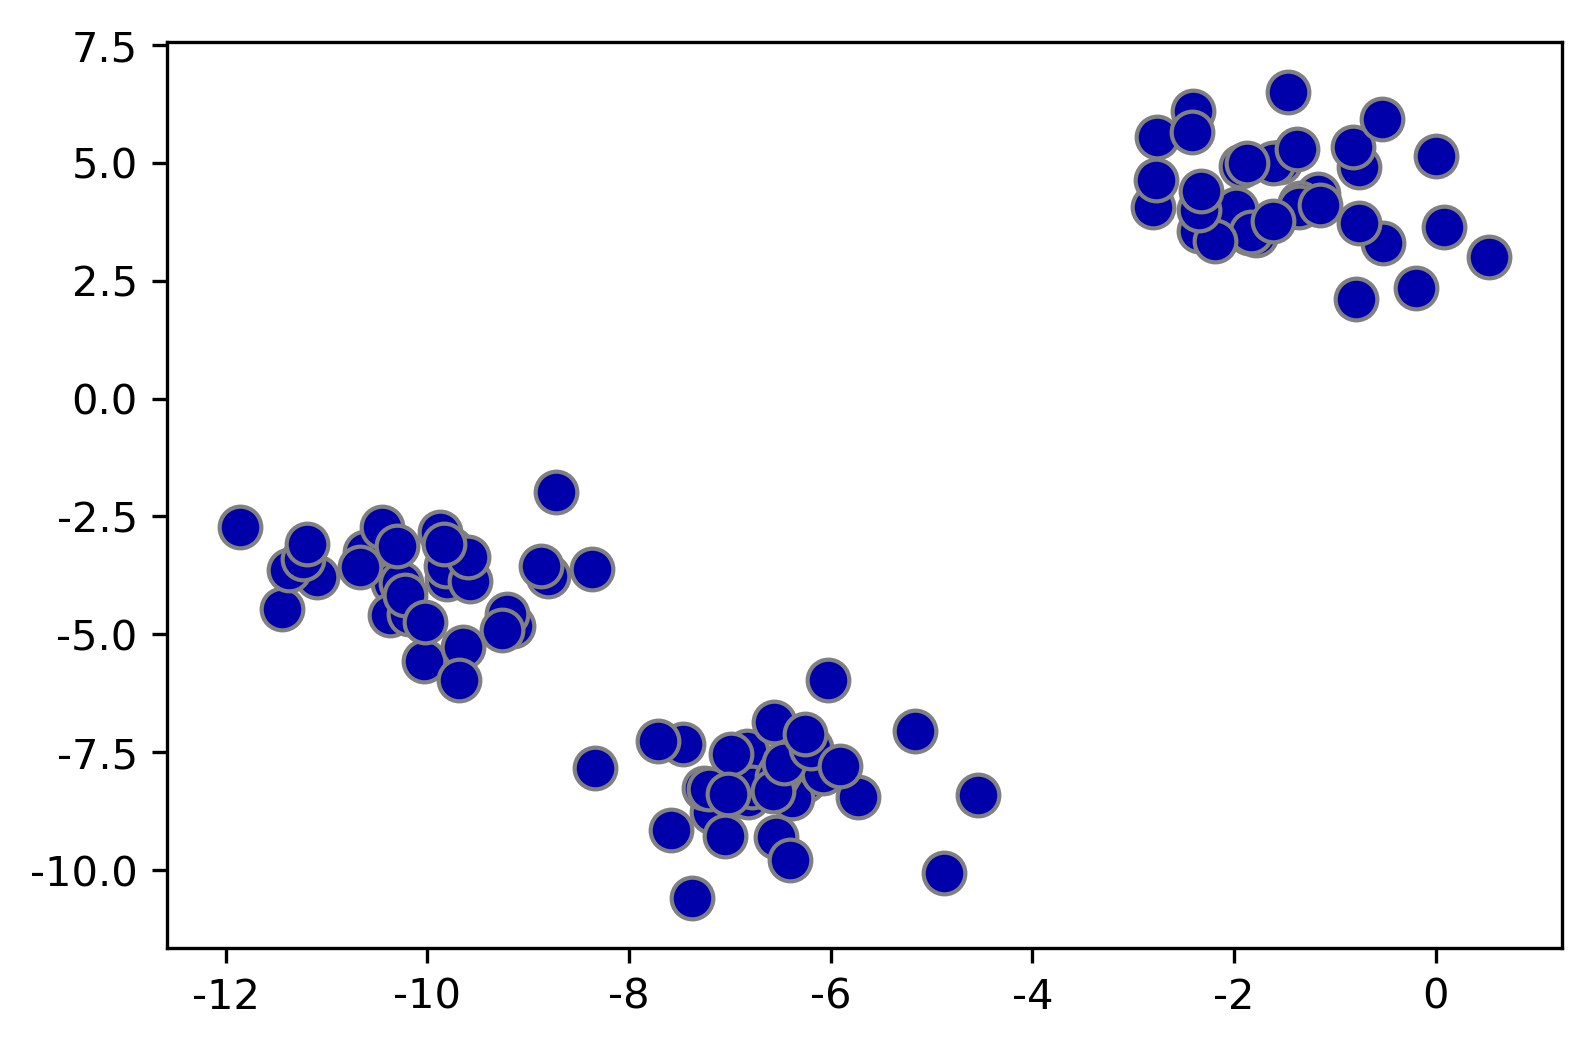

In [2]:
# K-Means Clustering

from sklearn.datasets import make_blobs #데이터 현성하는 함수
from sklearn.cluster import KMeans #Kmean를 사용한다.

#인위적으로 2차원 데이터를 생성합니다
x, y = make_blobs(random_state=1)
mglearn.discrete_scatter(x[:, 0], x[:,1], markers="o")
#mglearn은 교제에 주는 데이터 클래스고 거기에 뿌려주는 함수이다.

In [3]:
#군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3) #3개의 클러스터로 나눠라
kmeans.fit(x)

#지도학습 처럼 1,2,3 이렇게 분류를 주어진게 아니라 알아서 분류해준것이다.
print("kmeans label \n",kmeans.labels_)
print("kmeans predict \n",kmeans.predict(x))

kmeans label 
 [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
kmeans predict 
 [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


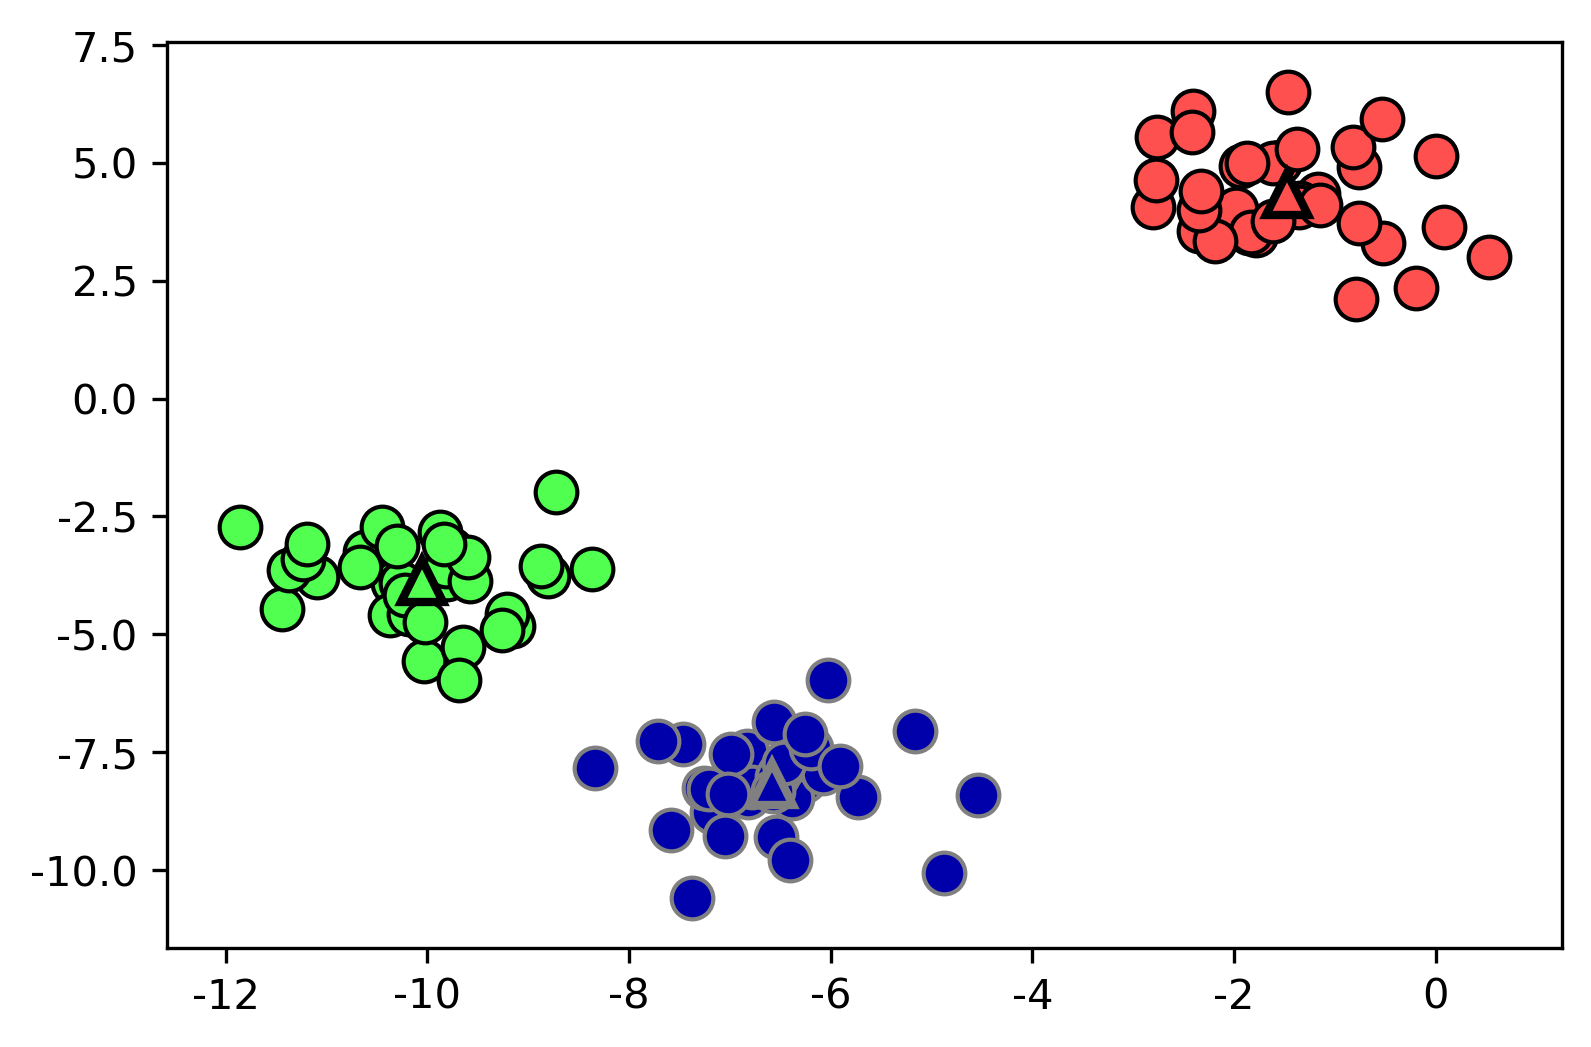

In [5]:
kmeans = KMeans(n_clusters=3) #3개의 클러스터로 나눠라
kmeans.fit(x)

mglearn.discrete_scatter(x[:,0], x[:,1], kmeans.labels_, markers="o")#뿌려주는 것
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1],
                        [0,1,2],
                        markers="^",
                        markeredgewidth=2)
#center는 클러스터 센터에 적용이된다. 세모가 센터이다.

Text(0, 0.5, 'feature 1')

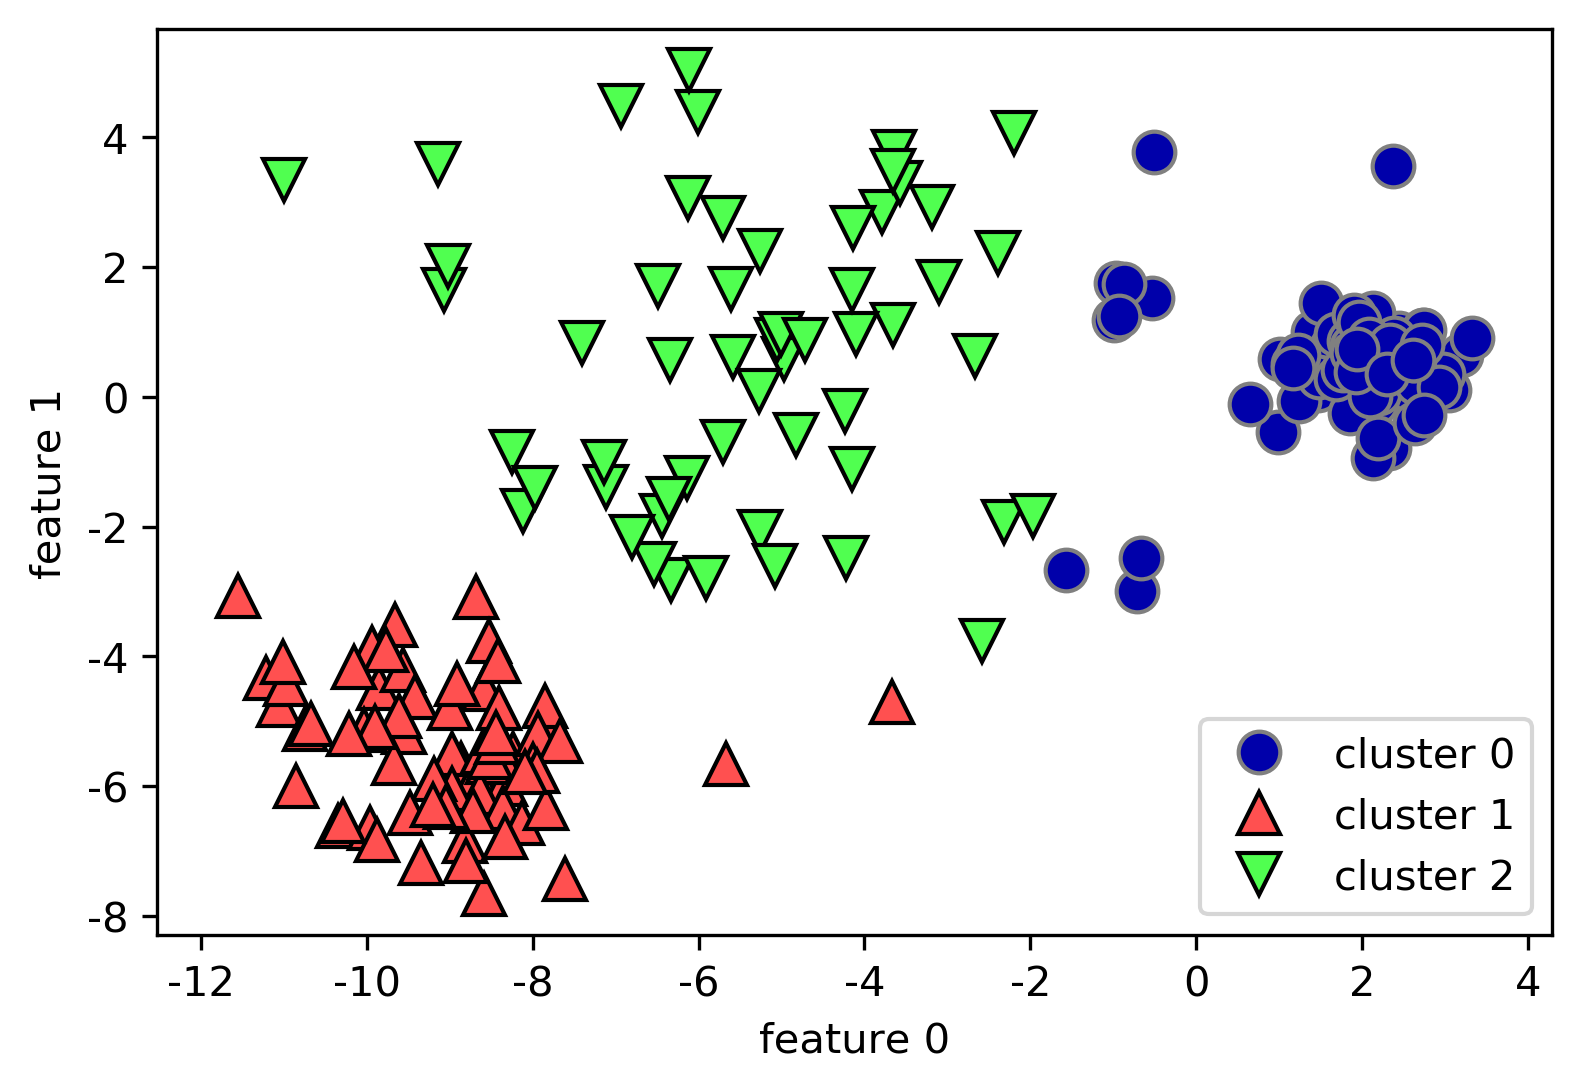

In [10]:
#K-Means Clustering 실패

#1.0 , 2.5 . 0.5는 퍼짐 정도를 말한다.
xvaried, yvaried = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)

ypred = KMeans(n_clusters=3, random_state=0).fit_predict(xvaried)

mglearn.discrete_scatter(xvaried[:,0], xvaried[:,1], ypred)
plt.legend(["cluster 0","cluster 1","cluster 2"], loc="best")
plt.xlabel("feature 0")
plt.ylabel("feature 1")

#실패한 이유는 분산 정도가 확실하게 되어 있지 않기 때문이다.
#분산 정도가 크면 확실하게 클러스터링 하기가 쉽지 않다

Text(0, 0.5, 'feature 1')

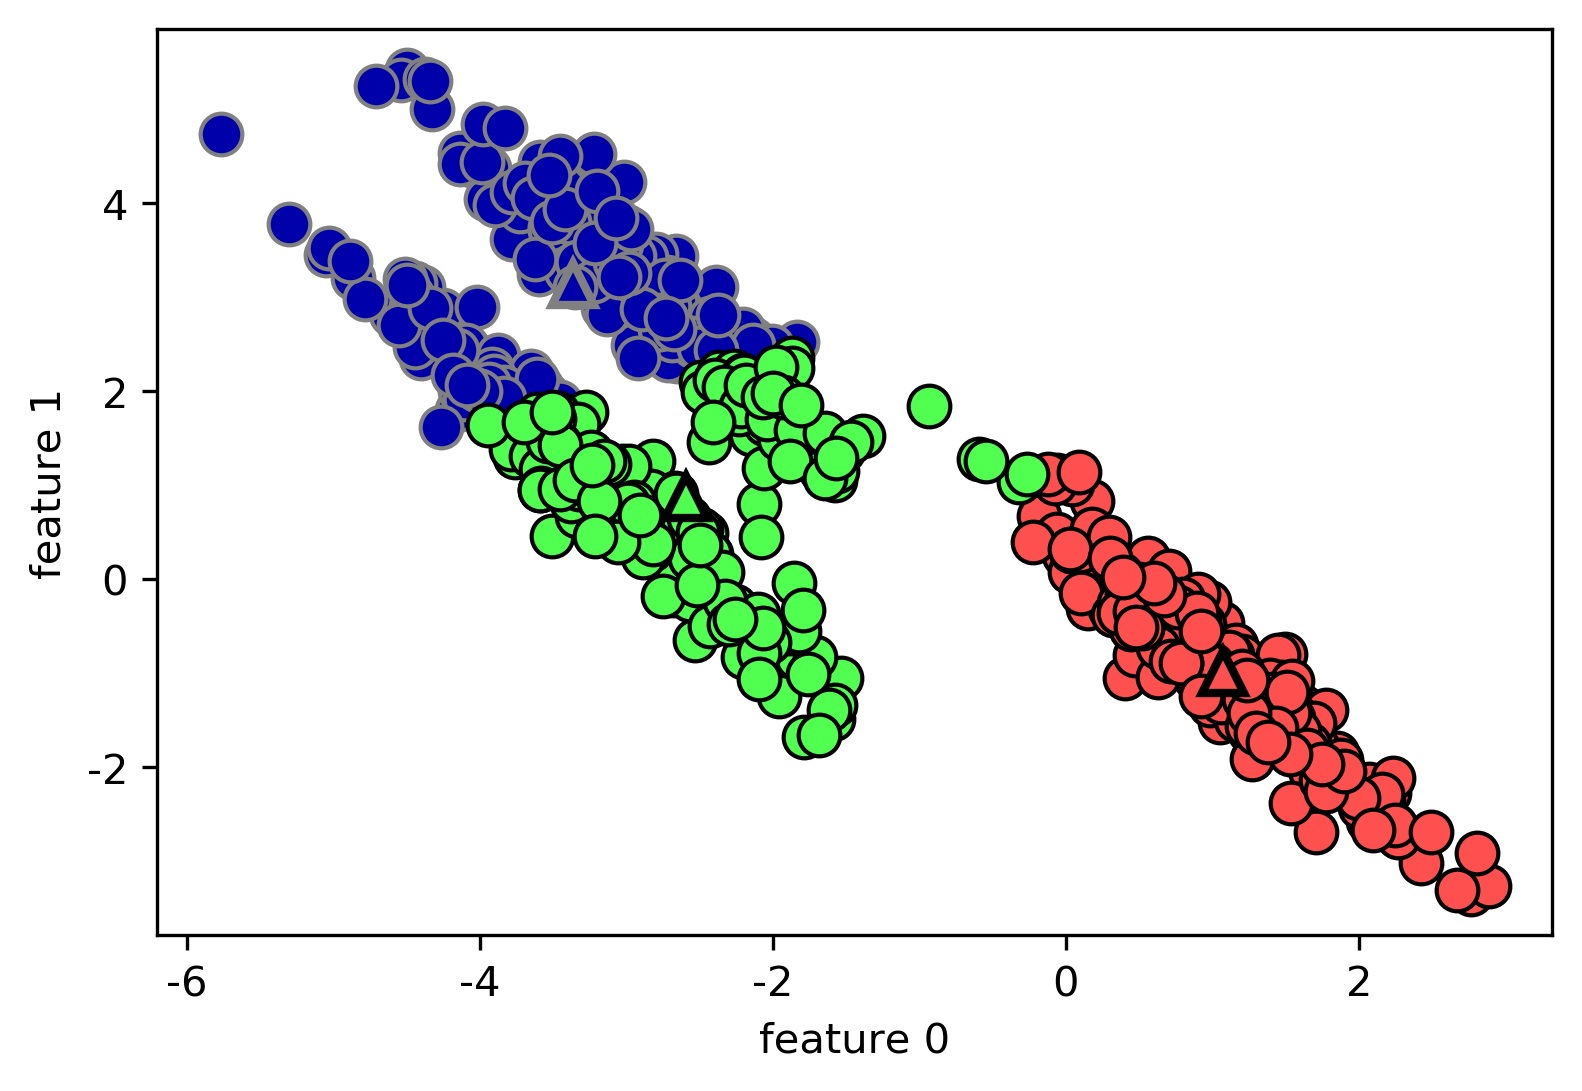

In [8]:
# 무작위로 클러스터 데이터를 생성합니다.
x, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다.
transformation = rng.normal(size=(2,2))
x = np.dot(x, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
ypred = kmeans.predict(x)

# 클러스터 할당과 클러스터 중심을 나타냅니다.
mglearn.discrete_scatter(x[:,0], x[:,1], kmeans.labels_, markers="o")
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1],
                        [0,1,2],
                        markers="^",
                        markeredgewidth=2)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

#딱 봐도 잘 나눠지지 않았고 서로 겹치면서 되어 있다.

Text(0, 0.5, 'feature 1')

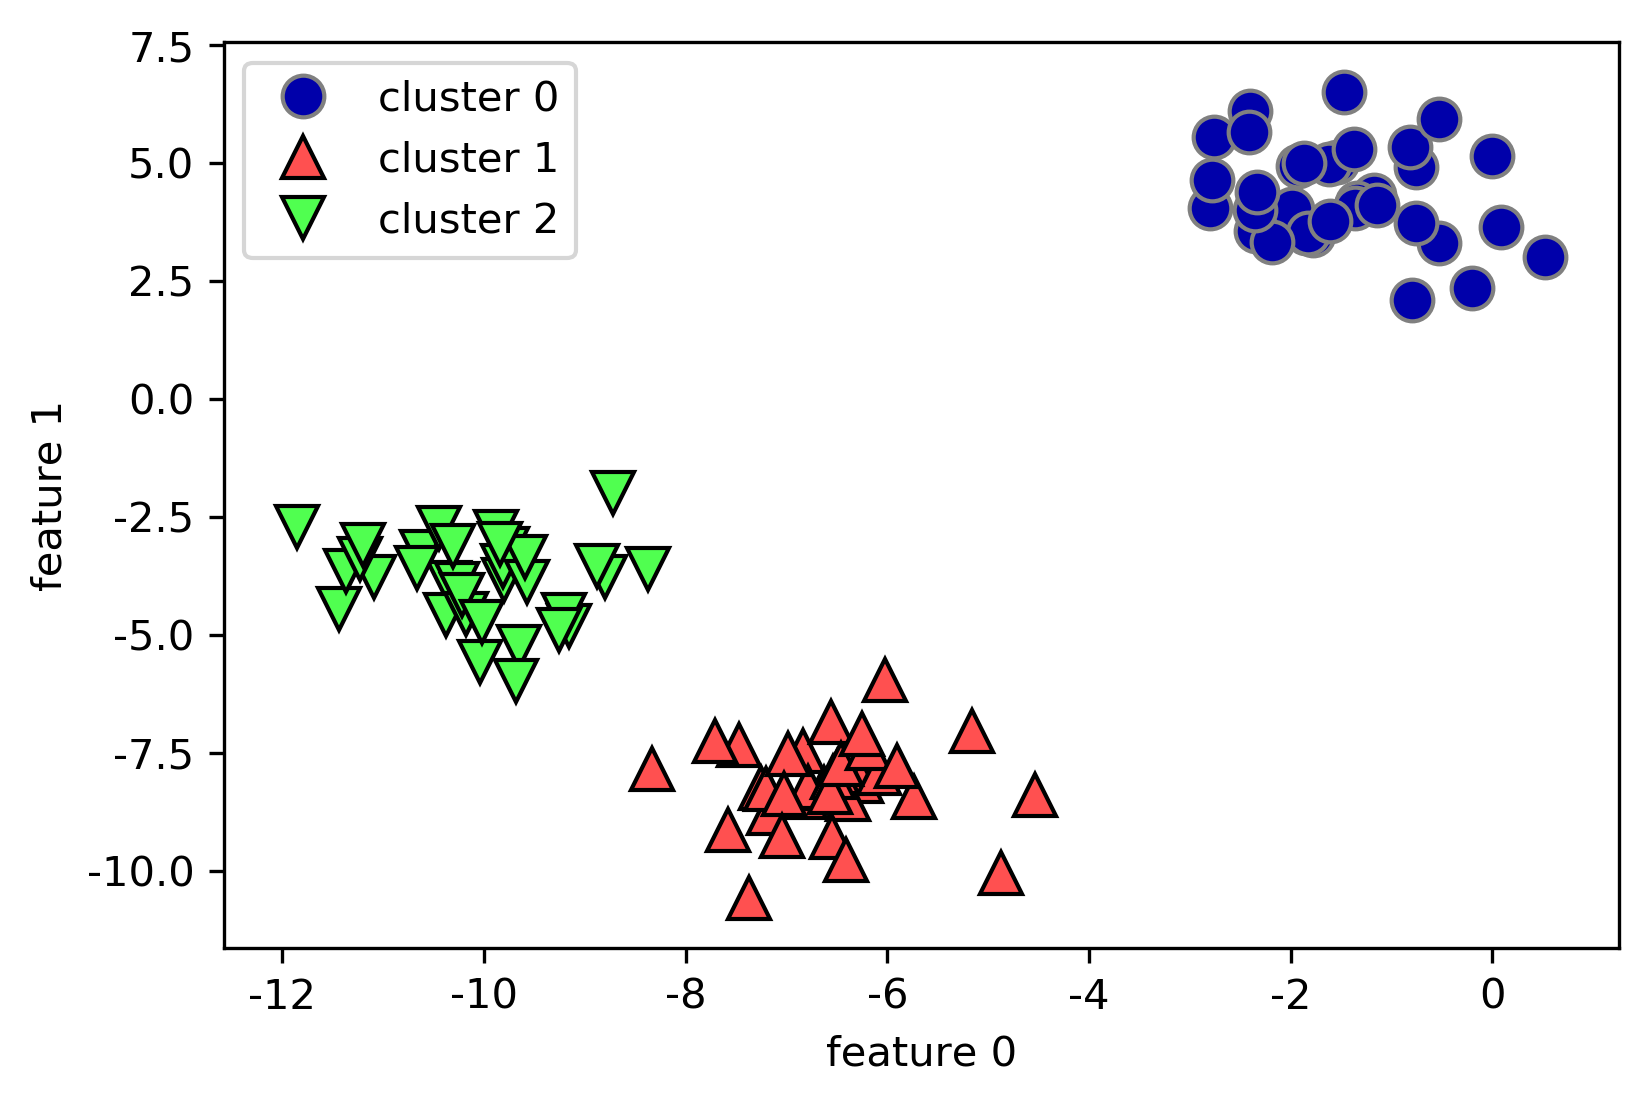

In [10]:
#병합 군집 Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

x, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3) #클러스터 갯수는 3개
assignment = agg.fit_predict(x)

mglearn.discrete_scatter(x[:,0], x[:,1], assignment)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc="best")
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [11]:
#DBSCAN

from sklearn.cluster import DBSCAN

x, y = make_blobs(random_state = 0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(x)
#dbscan = DBSCAN(min_samples=min_samples, eps=eps)
print("클러스터 레이블: \n", clusters)

# 클러스터링이 다 -1이라면 클러스터링이 잘 못 했다는 것을 의미한다.
# 이렇게 -1로만 이루어져 있다면 그 때 min_sample을 해주는 것이다.

클러스터 레이블: 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


min_samples: 2 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  클러스터: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]


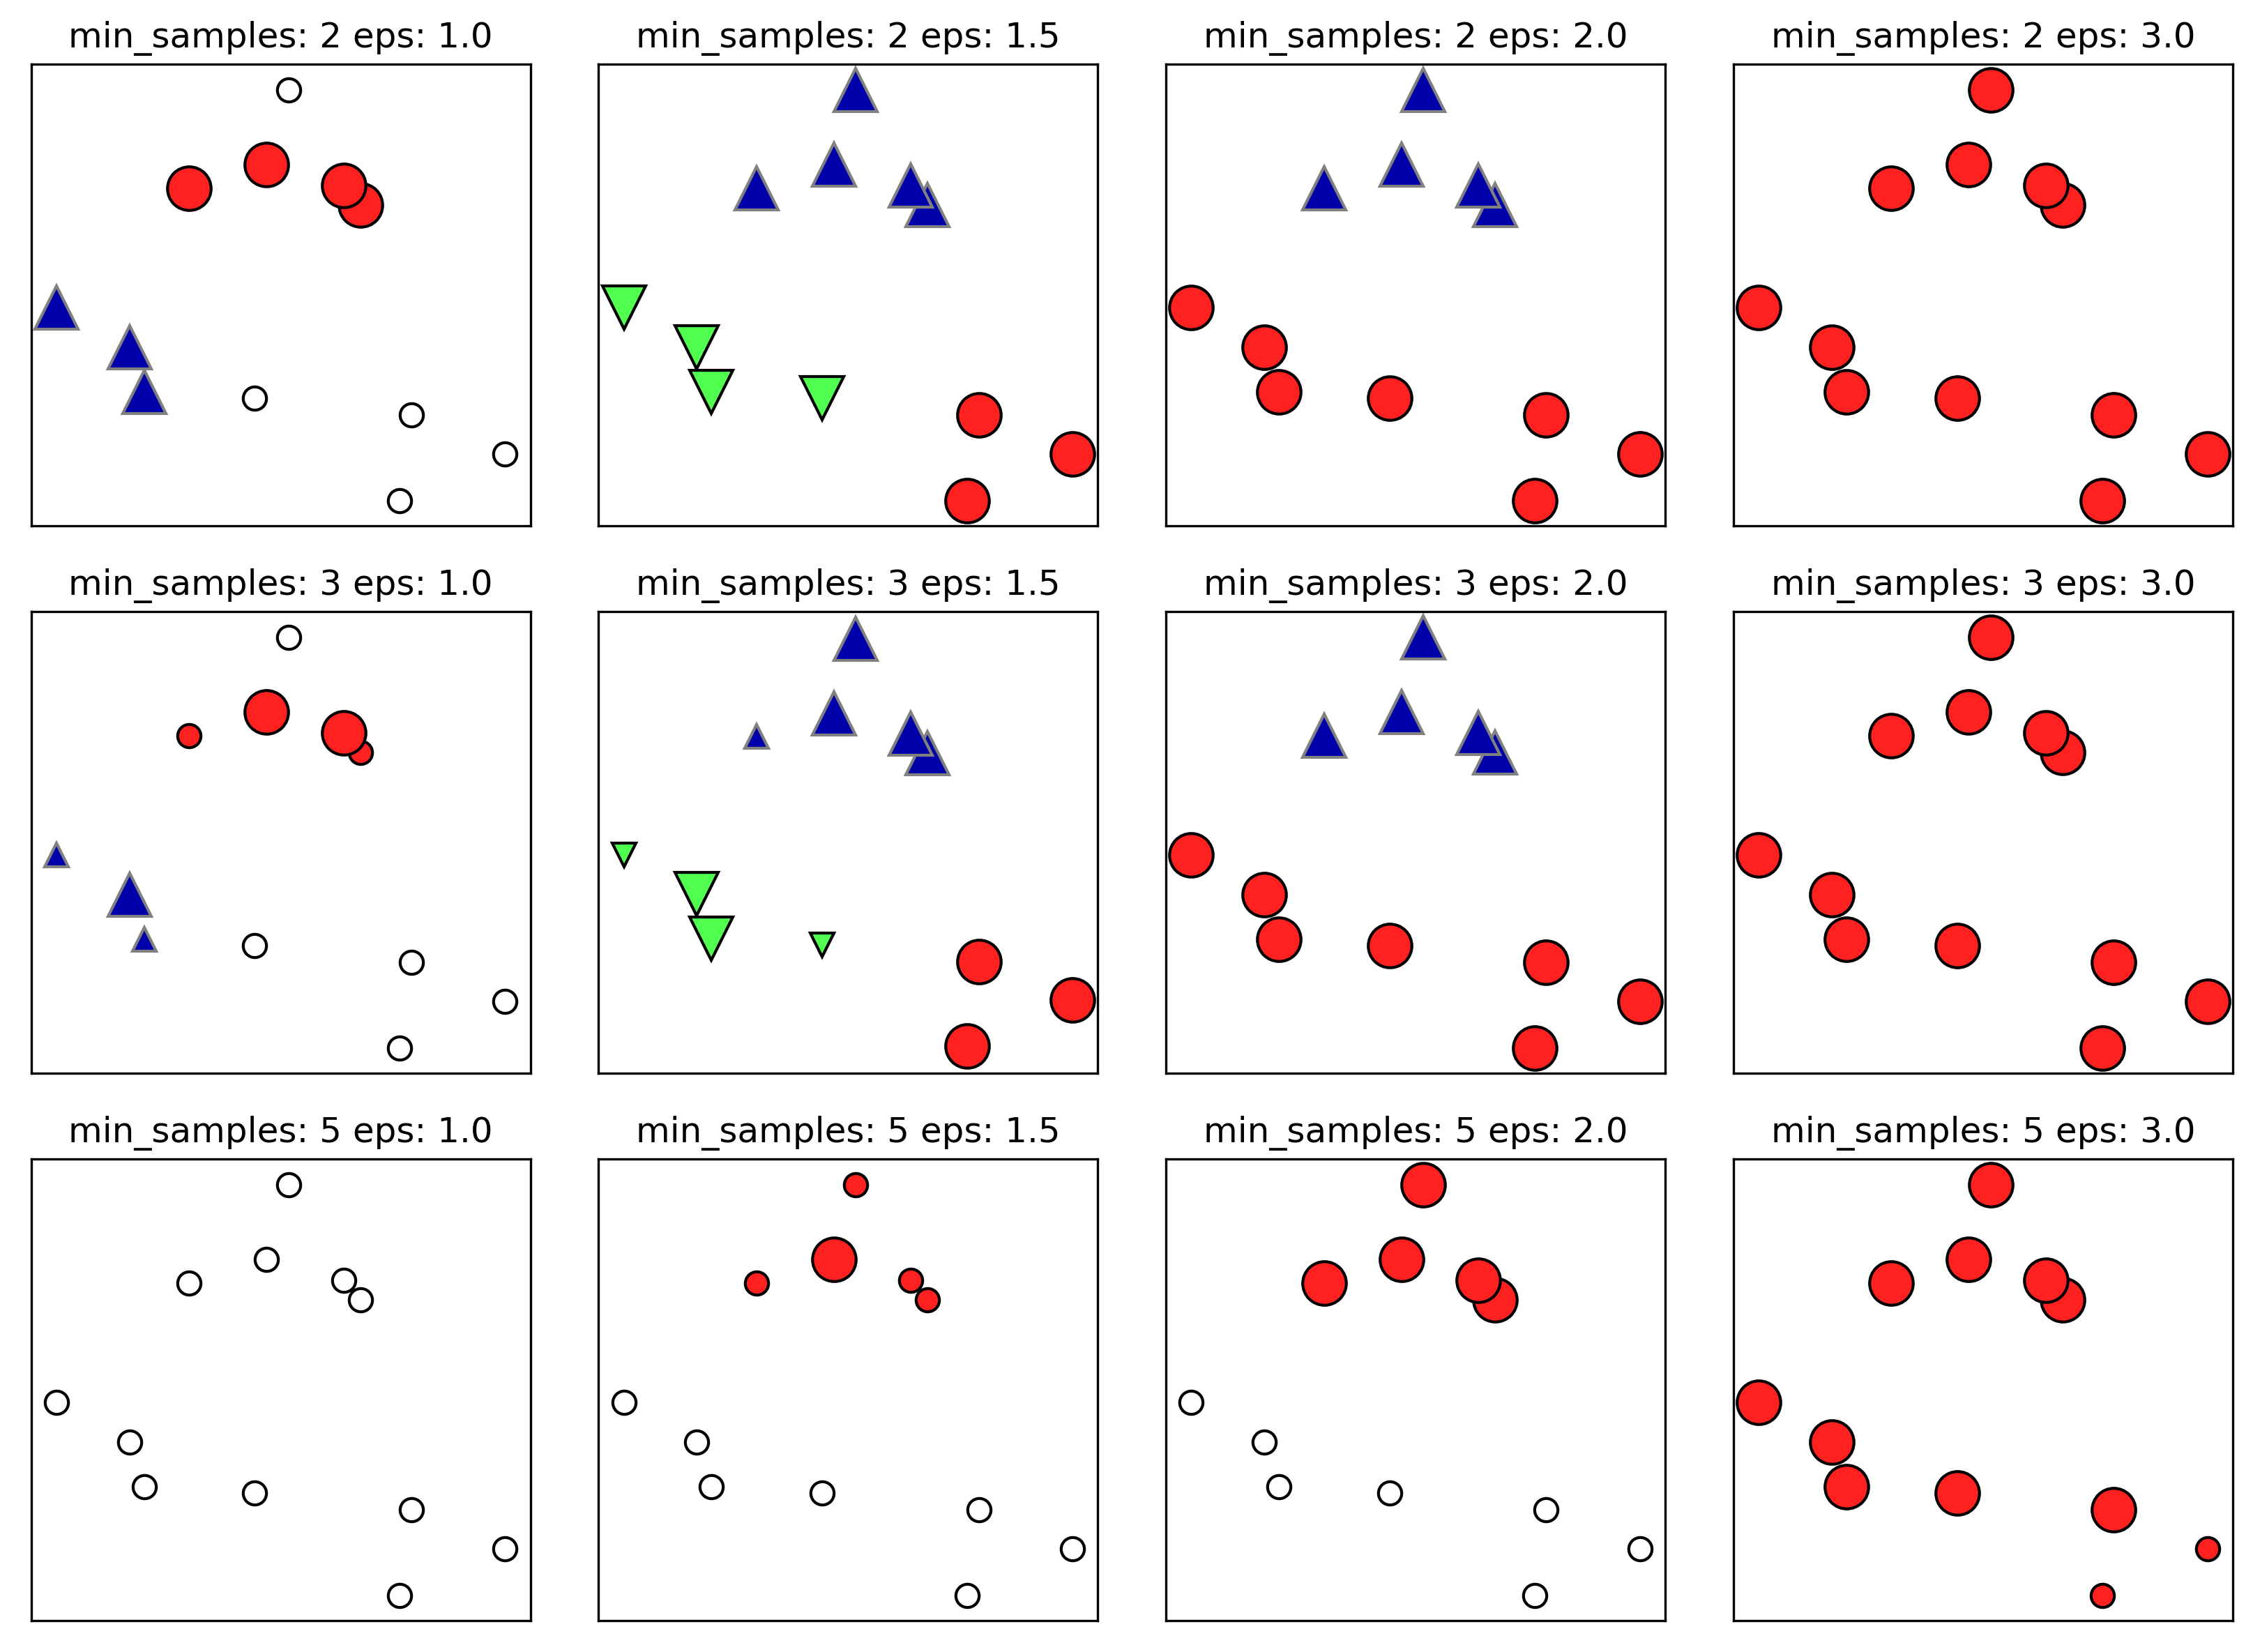

In [12]:
mglearn.plots.plot_dbscan()

# eps가 늘어갈 수록 클러스터 수가 증가 되고 결구 하나가 된다.
# min_sample이 늘어날 수록 노이즈의 갯수가 증가한다.

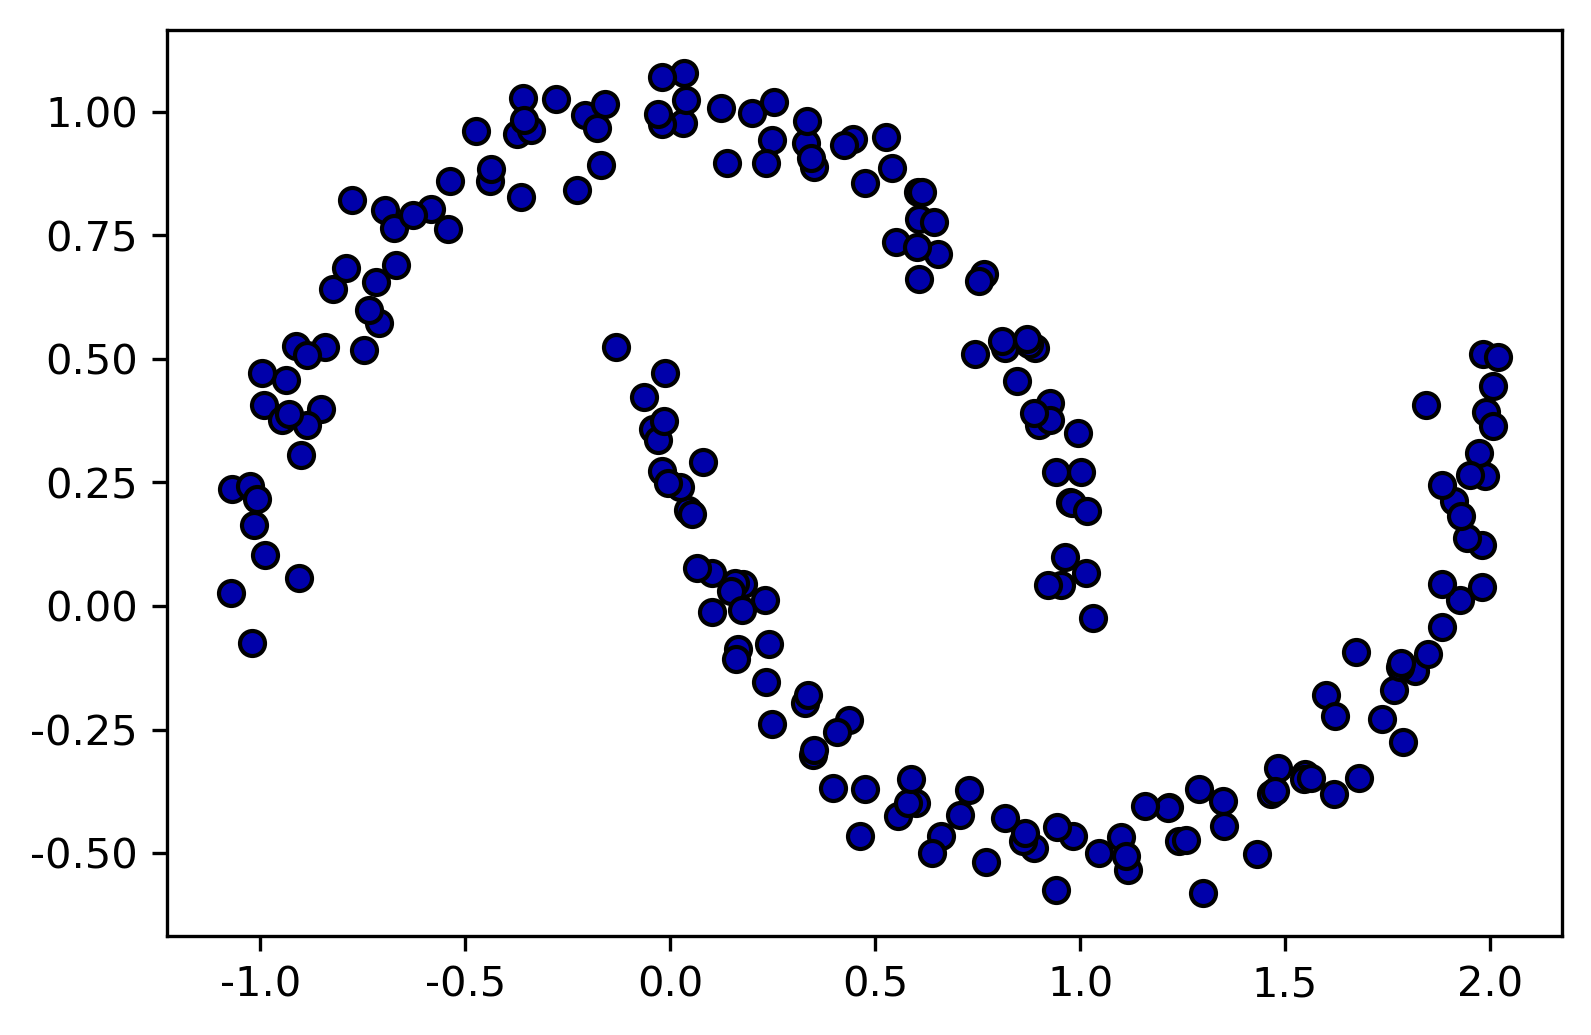

In [16]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise = 0.05, random_state=0) #사이킬런에서 제공해주는 것
plt.scatter(x[:,0], x[:,1], edgecolors="black")

Text(0, 0.5, 'feature 1')

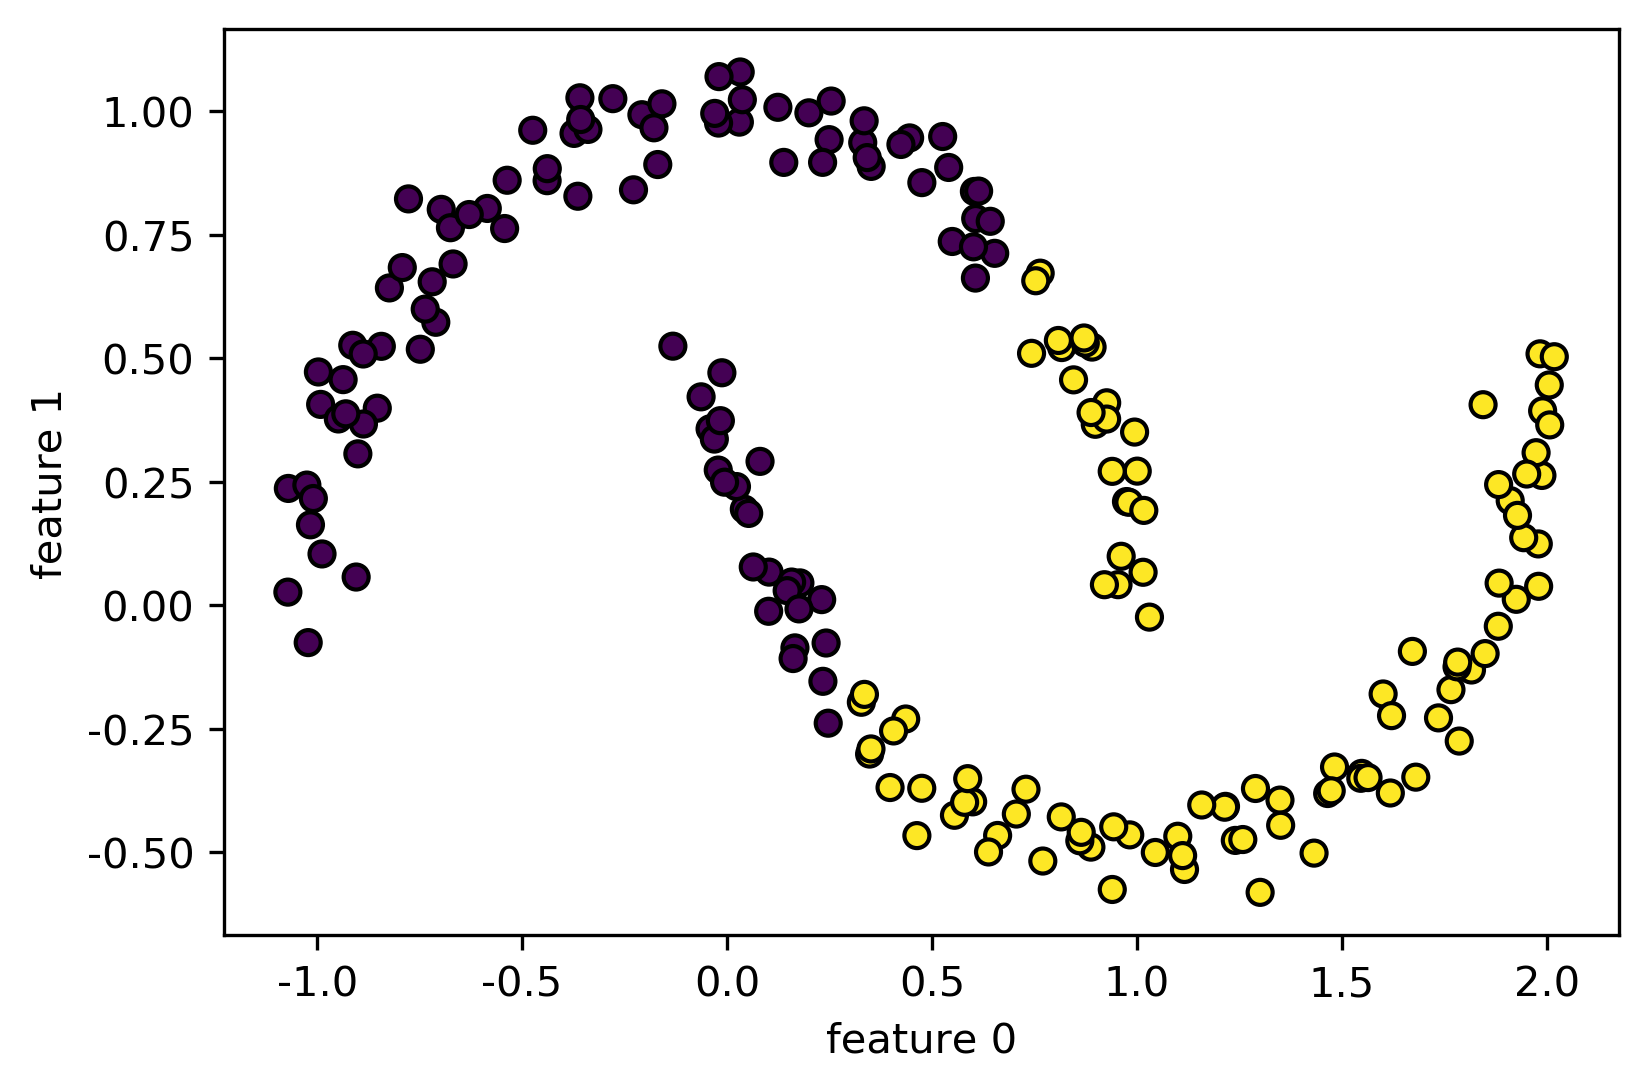

In [17]:
# 두개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(x)

#클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(x[:,0], x[:,1], c=y_pred, edgecolors="k")
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

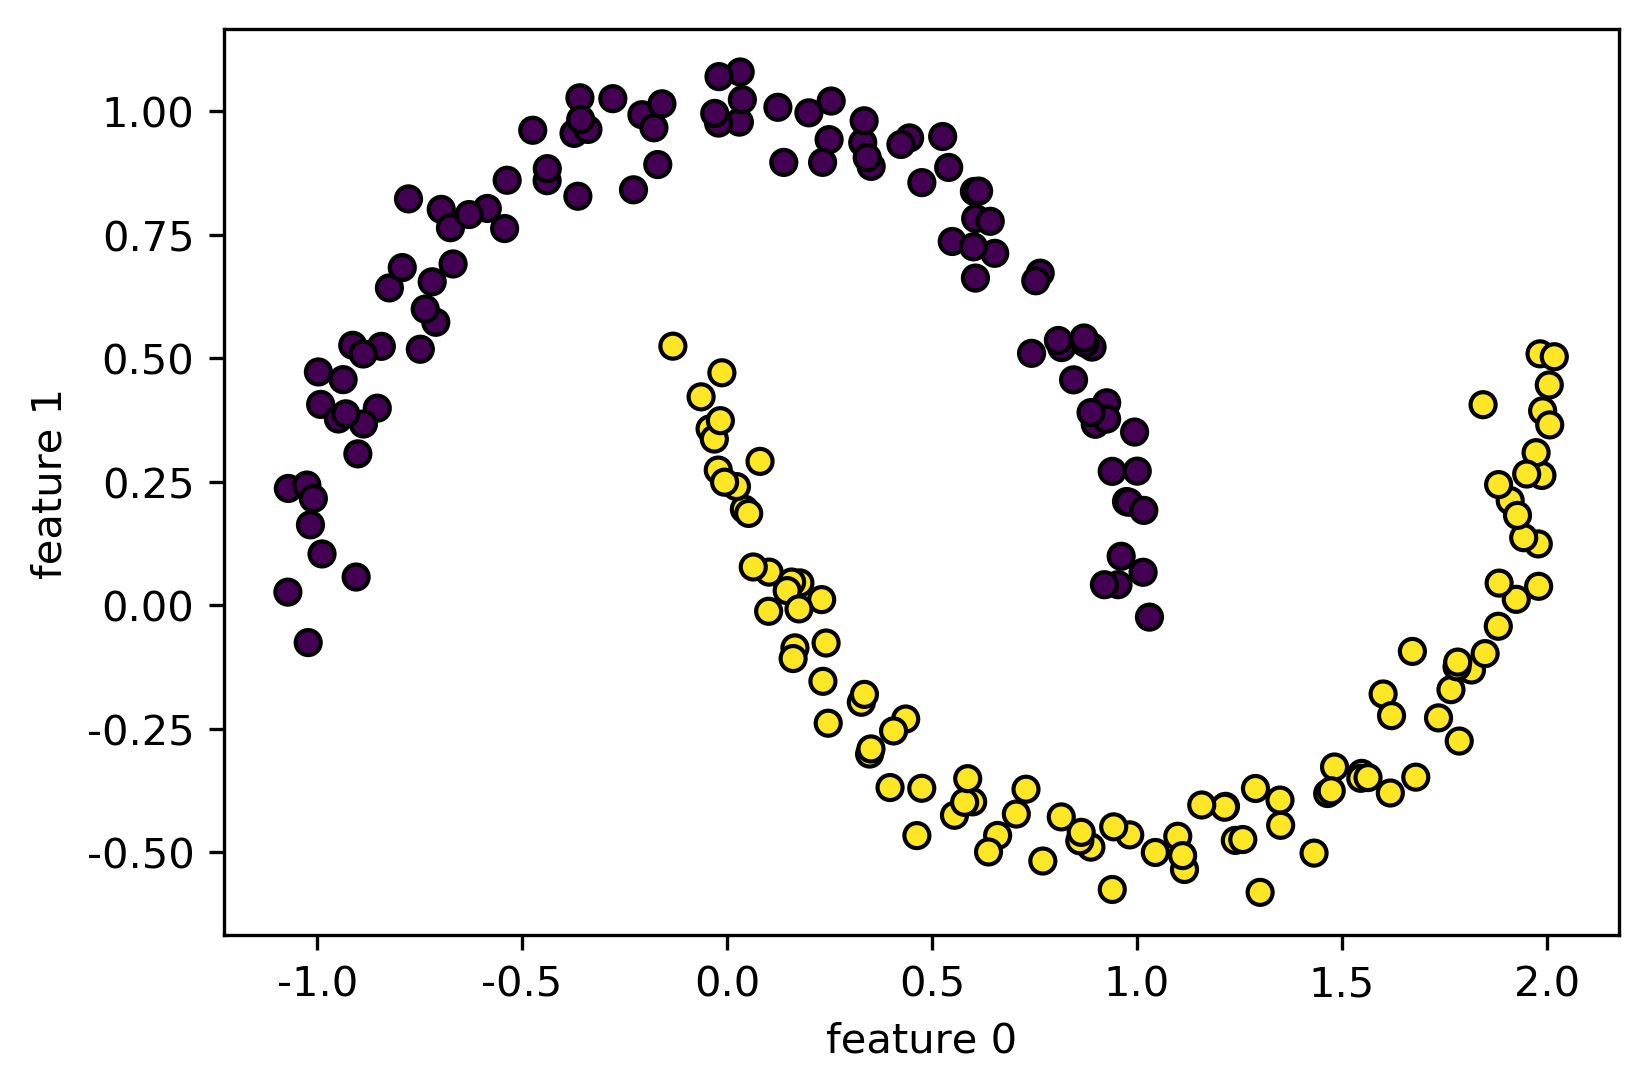

In [19]:
#평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다.

scaler = StandardScaler()
xscaled = scaler.fit_transform(x)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(xscaled)

#클러스터 할당을 표시합니다.
plt.scatter(x[:,0], x[:,1], c=clusters, edgecolors="black")
plt.xlabel("feature 0")
plt.ylabel("feature 1")